Meilleurs hyperparamètres (GridSearchCV): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleure précision (GridSearchCV): 1.0
Précision sur l'ensemble de test (GridSearchCV): 1.0
Accuracy: 1.0


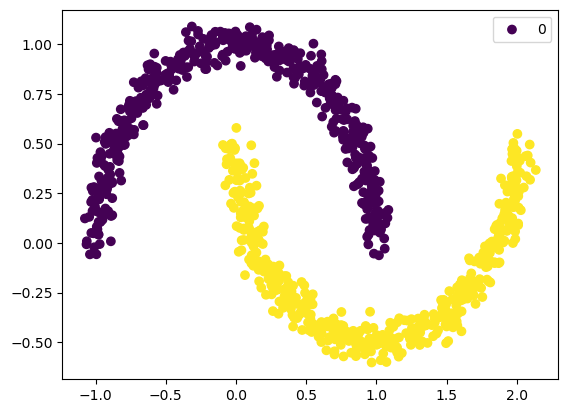

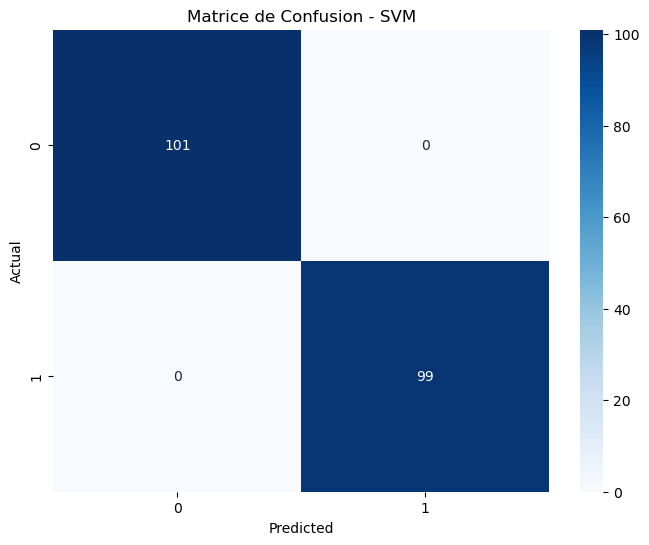

In [60]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Chargez un jeu de données (par exemple, moons)
X, y = make_moons(n_samples=1000, noise=0.05)

# Visualisez les données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.legend(y,)

# Divisez les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle SVM (SVC) avec des hyperparamètres que vous souhaitez optimiser
svm_model = SVC()

# Définissez la grille des hyperparamètres à rechercher avec GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 'scale']
}

# Créez un objet GridSearchCV pour la recherche exhaustive
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Exécutez la recherche exhaustive sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Affichez les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres (GridSearchCV):", grid_search.best_params_)

# Affichez la meilleure précision trouvée
print("Meilleure précision (GridSearchCV):", grid_search.best_score_)

# Utilisez les meilleurs hyperparamètres pour évaluer le modèle sur l'ensemble de test
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Précision sur l'ensemble de test (GridSearchCV):", test_accuracy)

# Entrainez un modèle SVM (SVC) avec les meilleurs hyperparamètres
best_gradient_svm = SVC(**grid_search.best_params_)
best_gradient_svm.fit(X_train, y_train)

# Predisez les étiquettes sur l'ensemble de test
y_pred_best_model = best_gradient_svm.predict(X_test)

# Affichez les performances de classification
best_model_accuracy = accuracy_score(y_test, y_pred_best_model)
print("Accuracy:", best_model_accuracy)

# Affichez la matrice de confusion avec heatmap
best_model_confusion_matrix = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(8, 6))
sns.heatmap(best_model_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion - SVM')
plt.show()


Meilleurs hyperparamètres (RandomizedSearchCV): {'kernel': 'rbf', 'C': 0.4051357868663279}
Meilleure précision (RandomizedSearchCV): 1.0
Précision sur l'ensemble de test (RandomizedSearchCV): 1.0
Accuracy: 1.0


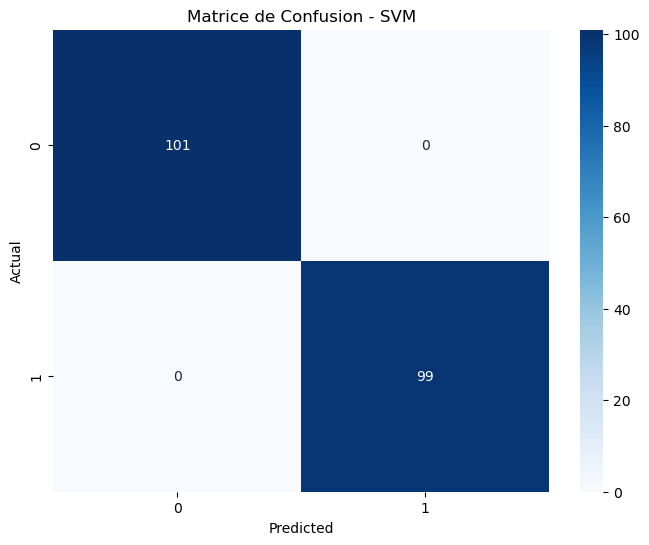

In [61]:
from scipy.stats import uniform, gamma
from sklearn.model_selection import RandomizedSearchCV

# Créez un modèle SVM (SVC) avec des hyperparamètres que vous souhaitez optimiser
svm_model = SVC()

# Définissez une distribution d'hyperparamètres pour la recherche aléatoire
param_dist = {
    'C': np.random.rand(10),
    'kernel': ['linear', 'rbf', 'poly']
}

# Créez un objet RandomizedSearchCV pour la recherche aléatoire
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=10, cv=5)

# Exécutez la recherche aléatoire sur l'ensemble d'entraînement
random_search.fit(X_train, y_train)

# Affichez les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres (RandomizedSearchCV):", random_search.best_params_)

# Affichez la meilleure précision trouvée
print("Meilleure précision (RandomizedSearchCV):", random_search.best_score_)

# Utilisez les meilleurs hyperparamètres pour évaluer le modèle sur l'ensemble de test
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Précision sur l'ensemble de test (RandomizedSearchCV):", test_accuracy)

# Entrainez un modèle SVM (SVC) avec les meilleurs hyperparamètres
best_gradient_svm = SVC(**random_search.best_params_)
best_gradient_svm.fit(X_train, y_train)

# Predisez les étiquettes sur l'ensemble de test
y_pred_best_model = best_gradient_svm.predict(X_test)

# Affichez les performances de classification
best_model_accuracy = accuracy_score(y_test, y_pred_best_model)
print("Accuracy:", best_model_accuracy)

# Affichez la matrice de confusion avec heatmap
best_model_confusion_matrix = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(8, 6))
sns.heatmap(best_model_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion - SVM')
plt.show()
